In [360]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import config
os.chdir(config.LOOP_CATALOG_DIR)
sns.set_theme(style="whitegrid")
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

## Load Spreadsheets

In [4]:
human = pd.read_excel('tables/human_loops_3_27_23.xlsx', sheet_name = 'hg38', index_col = 0, skiprows=[0, 1])
#mouse = pd.read_excel('tables/loops.xlsx', sheet_name = 'Mouse', index_col = 0, skiprows=[0,1])

In [5]:
human

,sample_name,5kb,10kb,25kb,Peaks,S5kb,L5kb,S10kb,L10kb,S25kb,L25kb,Peaks.1,S5kb.1,L5kb.1,S10kb.1,L10kb.1,S25kb.1,L25kb.1,Peaks.2,S5kb.2,L5kb.2,S10kb.2,L10kb.2,S25kb.2,L25kb.2
1,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,NaN,NaN,NaN,90971.0,0.0,0.0,0.0,0.0,0.0,0.0,968,0,0,0,0,0,0,29430,0,0,0,0,0,0
2,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,NaN,NaN,NaN,93587.0,0.0,0.0,0.0,0.0,3.0,5.0,1801,0,0,0,0,2,2,73184,0,0,0,0,3,5
3,293T.GSE128106.Homo_Sapiens.YY1.b1,NaN,NaN,NaN,119725.0,0.0,0.0,0.0,0.0,0.0,0.0,43,0,0,0,0,238,2,987,0,0,0,0,0,0
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,NaN,NaN,NaN,115154.0,177.0,393.0,2800.0,6010.0,30157.0,51884.0,2661,31,349,412,2696,2533,9825,11489,47,346,776,3989,8323,24510
5,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,NaN,NaN,NaN,115154.0,35.0,65.0,570.0,1284.0,9008.0,16829.0,3468,6,80,123,994,1328,5859,10428,7,58,148,990,2518,9413
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,NaN,NaN,NaN,102935.0,11.0,23.0,734.0,1745.0,22242.0,39397.0,823,3,30,50,530,703,2944,7761,4,29,186,1111,4839,15127
7,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,NaN,NaN,NaN,102935.0,3.0,7.0,123.0,295.0,7040.0,13616.0,2205,3,8,38,227,672,3195,23228,3,6,71,260,3720,9577
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,NaN,NaN,NaN,104318.0,3.0,3.0,56.0,93.0,8455.0,14863.0,49,0,2,0,21,0,121,9018,3,4,39,94,2688,5674
9,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,NaN,NaN,NaN,104318.0,4.0,4.0,10.0,17.0,3662.0,6444.0,46,0,2,0,6,0,61,27484,5,5,16,23,2398,4350
10,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29585,3747,12292,10675,35490,25651,69659,60295,3514,11200,11313,34768,33321,79208


In [7]:
# extract fithichip peaks columns only 
columns = ['sample_name', 'Peaks', 'S5kb', 'L5kb', 'S10kb', 'L10kb', 'S25kb', 'L25kb']
#mouse_fithichip = mouse[columns]
human_fithichip = human[columns]
human_fithichip = human_fithichip.loc[human_fithichip["Peaks"] > 0]
human_fithichip = human_fithichip.reset_index(drop=True)

In [8]:
# extract columns for which all resolutions posssess >0 loops and S < L
#columns = ['sample_name', 'num_peaks', 'S_5kb', 'L_5kb', 'S_10kb', 'L_10kb', 'S_25kb', 'L_25kb', 'Test']
#mouse_fithichip_good = mouse_fithichip[mouse_fithichip['Test.1'] == 'good']
#mouse_fithichip_good = mouse_fithichip_good.reset_index(drop=True)
#mouse_fithichip_good.columns = columns

#human_fithichip_good = human_fithichip[human_fithichip['Test.1'] == 'good']
#human_fithichip_good = human_fithichip_good.reset_index(drop=True)
#human_fithichip_good.columns = columns

In [9]:
human_fithichip

,sample_name,Peaks,S5kb,L5kb,S10kb,L10kb,S25kb,L25kb
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,90971.0,0.0,0.0,0.0,0.0,0.0,0.0
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,93587.0,0.0,0.0,0.0,0.0,3.0,5.0
2,293T.GSE128106.Homo_Sapiens.YY1.b1,119725.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,115154.0,177.0,393.0,2800.0,6010.0,30157.0,51884.0
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,115154.0,35.0,65.0,570.0,1284.0,9008.0,16829.0
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,102935.0,11.0,23.0,734.0,1745.0,22242.0,39397.0
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,102935.0,3.0,7.0,123.0,295.0,7040.0,13616.0
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,104318.0,3.0,3.0,56.0,93.0,8455.0,14863.0
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,104318.0,4.0,4.0,10.0,17.0,3662.0,6444.0
9,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,163779.0,12786.0,53896.0,28571.0,110387.0,64184.0,158929.0


In [10]:
human_fithichip_cut = human_fithichip.loc[human_fithichip["sample_name"].str.contains("H3K27ac")]
human_fithichip_cut = human_fithichip_cut.loc[human_fithichip_cut["S5kb"] > 0]
human_fithichip_cut = human_fithichip_cut.reset_index(drop=True)

In [11]:
human_fithichip_cut

,sample_name,Peaks,S5kb,L5kb,S10kb,L10kb,S25kb,L25kb
0,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,163779.0,12786.0,53896.0,28571.0,110387.0,64184.0,158929.0
1,BC1.GSE136090.Homo_Sapiens.H3K27ac.b1,65391.0,21.0,39.0,92.0,208.0,807.0,2133.0
2,BCBL1.GSE136090.Homo_Sapiens.H3K27ac.b1,80773.0,362.0,1053.0,1060.0,4011.0,4502.0,14443.0
3,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,130219.0,40515.0,146863.0,75629.0,226532.0,133443.0,282327.0
4,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,136763.0,16665.0,34918.0,20274.0,48106.0,20019.0,51927.0
5,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,136763.0,13069.0,27075.0,16621.0,39179.0,16922.0,44067.0
6,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3,136763.0,4007.0,7145.0,6335.0,13265.0,7259.0,18655.0
7,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,136763.0,12815.0,28151.0,16240.0,40323.0,16044.0,44654.0
8,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,136763.0,12266.0,26963.0,15571.0,39093.0,15531.0,43466.0
9,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3,136763.0,3152.0,5785.0,5380.0,11813.0,6184.0,16906.0


In [13]:
human_fithichip_k27 = human_fithichip_cut.copy()

## Load FASTQC Reports

In [30]:
def read_fastqc_report(log):
    log_data = {}
    with open(log) as fr:
        for line in fr:
            info = line.strip().split("\t")
            log_data[info[1]] = info[0]
    return(log_data)

In [31]:
path = "results/qc/fastqc/*/*/summary.txt"
human_data = []
mouse_data = []
for f in glob.glob(path):
    std_sample_name = f.split('/')[3]
    if "Mus" in std_sample_name:
        data = read_fastqc_report(f)
        data['std_sample_name'] = std_sample_name
        mouse_data.append(data)
    elif "Homo" in std_sample_name:
        data = read_fastqc_report(f)
        data['std_sample_name'] = std_sample_name
        human_data.append(data)

human_fastqc = pd.DataFrame.from_dict(human_data)
mouse_fastqc = pd.DataFrame.from_dict(mouse_data)



In [32]:
human_fastqc = human_fastqc[['std_sample_name', 'Basic Statistics', 'Per base sequence quality', 'Per tile sequence quality', 'Per sequence quality scores', 'Per base sequence content', 'Per sequence GC content', 'Per base N content', 'Sequence Length Distribution', 'Sequence Duplication Levels', 'Overrepresented sequences', 'Adapter Content']]
mouse_fastqc = mouse_fastqc[['std_sample_name', 'Basic Statistics', 'Per base sequence quality', 'Per tile sequence quality', 'Per sequence quality scores', 'Per base sequence content', 'Per sequence GC content', 'Per base N content', 'Sequence Length Distribution', 'Sequence Duplication Levels', 'Overrepresented sequences', 'Adapter Content']]

human_fastqc = human_fastqc.sort_values(by='std_sample_name').reset_index(drop=True)
mouse_fastqc = mouse_fastqc.sort_values(by='std_sample_name').reset_index(drop=True)

In [33]:
human_fastqc

,std_sample_name,Basic Statistics,Per base sequence quality,Per tile sequence quality,Per sequence quality scores,Per base sequence content,Per sequence GC content,Per base N content,Sequence Length Distribution,Sequence Duplication Levels,Overrepresented sequences,Adapter Content
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,PASS,PASS,NaN,PASS,FAIL,FAIL,PASS,WARN,FAIL,FAIL,PASS
1,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,PASS,PASS,NaN,PASS,FAIL,FAIL,PASS,WARN,FAIL,FAIL,PASS
2,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,PASS,PASS,NaN,PASS,FAIL,WARN,PASS,WARN,FAIL,FAIL,PASS
3,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,PASS,PASS,NaN,PASS,FAIL,WARN,PASS,WARN,FAIL,FAIL,PASS
4,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,PASS,PASS,NaN,PASS,FAIL,FAIL,PASS,WARN,FAIL,FAIL,PASS
...,...,...,...,...,...,...,...,...,...,...,...,...
1505,lgs301283.GSE116193.Homo_Sapiens.H3K27ac.b1,PASS,PASS,NaN,PASS,FAIL,PASS,PASS,PASS,PASS,PASS,PASS
1506,lgs301315.GSE116193.Homo_Sapiens.CTCF.b1,PASS,PASS,NaN,PASS,FAIL,PASS,PASS,PASS,PASS,PASS,PASS
1507,lgs301315.GSE116193.Homo_Sapiens.CTCF.b1,PASS,PASS,NaN,PASS,FAIL,PASS,PASS,PASS,PASS,PASS,PASS
1508,lgs301315.GSE116193.Homo_Sapiens.H3K27ac.b1,PASS,PASS,NaN,PASS,FAIL,PASS,PASS,PASS,PASS,PASS,PASS


In [34]:
aggregation_functions = {'std_sample_name' : 'first', 'Basic Statistics' : 'sum', 'Per base sequence quality' : 'sum', 'Per tile sequence quality' : 'sum', 'Per sequence quality scores' : 'sum', 'Per base sequence content' : 'sum', 'Per sequence GC content' : 'sum', 'Per base N content' : 'sum', 'Sequence Length Distribution' : 'sum', 'Sequence Duplication Levels' : 'sum', 'Overrepresented sequences' : 'sum', 'Adapter Content' : 'sum'}
human_fastqc = human_fastqc.groupby(human_fastqc['std_sample_name']).aggregate(aggregation_functions)

In [35]:
columns = ['sample_name', 'Basic Statistics', 'Per base sequence quality', 'Per tile sequence quality', 'Per sequence quality scores', 'Per base sequence content', 'Per sequence GC content', 'Per base N content', 'Sequence Length Distribution', 'Sequence Duplication Levels', 'Overrepresented sequences', 'Adapter Content']
human_fastqc.columns = columns

In [36]:
human_fastqc = human_fastqc.reset_index(drop=True)

In [37]:
aggregation_functions = {'std_sample_name' : 'first', 'Basic Statistics' : 'sum', 'Per base sequence quality' : 'sum', 'Per tile sequence quality' : 'sum', 'Per sequence quality scores' : 'sum', 'Per base sequence content' : 'sum', 'Per sequence GC content' : 'sum', 'Per base N content' : 'sum', 'Sequence Length Distribution' : 'sum', 'Sequence Duplication Levels' : 'sum', 'Overrepresented sequences' : 'sum', 'Adapter Content' : 'sum'}
mouse_fastqc = mouse_fastqc.groupby(mouse_fastqc['std_sample_name']).aggregate(aggregation_functions)

In [38]:
mouse_fastqc = mouse_fastqc.reset_index(drop=True)
mouse_fastqc.columns = columns

In [39]:
human_fastqc

,sample_name,Basic Statistics,Per base sequence quality,Per tile sequence quality,Per sequence quality scores,Per base sequence content,Per sequence GC content,Per base N content,Sequence Length Distribution,Sequence Duplication Levels,Overrepresented sequences,Adapter Content
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,PASSPASSPASSPASS,PASSPASSPASSPASS,0,PASSPASSPASSPASS,FAILFAILFAILFAIL,FAILFAILWARNWARN,PASSPASSPASSPASS,WARNWARNWARNWARN,FAILFAILFAILFAIL,FAILFAILFAILFAIL,PASSPASSPASSPASS
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,PASSPASSPASSPASS,PASSPASSPASSPASS,0,PASSPASSPASSPASS,FAILFAILFAILFAIL,FAILFAILWARNWARN,PASSPASSPASSPASS,WARNWARNWARNWARN,FAILFAILFAILFAIL,FAILFAILWARNWARN,PASSPASSPASSPASS
2,293T.GSE128106.Homo_Sapiens.YY1.b1,PASSPASSPASSPASSPASSPASSPASSPASS,FAILPASSWARNPASSPASSPASSPASSPASS,0,PASSPASSPASSPASSPASSPASSPASSPASS,FAILFAILFAILFAILFAILFAILFAILFAIL,FAILFAILFAILWARNFAILFAILWARNFAIL,FAILPASSFAILPASSWARNWARNPASSWARN,WARNWARNWARNWARNWARNWARNWARNWARN,FAILFAILFAILFAILFAILFAILFAILFAIL,FAILFAILFAILWARNFAILFAILFAILFAIL,PASSPASSPASSPASSPASSPASSPASSPASS
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,PASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASS,0,PASSPASSPASSPASSPASSPASSPASSPASS,FAILFAILFAILFAILFAILFAILFAILFAIL,PASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSWARNPASSPASSWARNPASSWARN,PASSPASSPASSPASSPASSPASSPASSPASS,FAILFAILFAILFAILFAILFAILFAILFAIL
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,PASSPASSPASSPASS,PASSPASSPASSPASS,0,PASSPASSPASSPASS,FAILFAILFAILFAIL,PASSPASSPASSPASS,PASSPASSPASSPASS,PASSPASSPASSPASS,PASSPASSPASSPASS,PASSPASSPASSPASS,FAILFAILFAILFAIL
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,PASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASS,0,PASSPASSPASSPASSPASSPASSPASSPASS,FAILFAILFAILFAILFAILFAILFAILFAIL,PASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSWARNWARN,PASSPASSPASSPASSPASSPASSPASSPASS,FAILFAILFAILFAILWARNWARNWARNWARN
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,PASSPASSPASSPASS,PASSPASSPASSPASS,0,PASSPASSPASSPASS,FAILFAILFAILFAIL,PASSPASSPASSPASS,PASSPASSPASSPASS,PASSPASSPASSPASS,PASSPASSPASSPASS,PASSPASSPASSPASS,WARNWARNWARNWARN
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,PASSPASSPASSPASS,PASSPASSPASSPASS,0,PASSPASSPASSPASS,FAILFAILFAILFAIL,PASSPASSPASSPASS,PASSPASSPASSPASS,PASSPASSPASSPASS,PASSPASSPASSPASS,PASSPASSPASSPASS,FAILFAILFAILFAIL
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,PASSPASSPASSPASS,PASSPASSPASSPASS,0,PASSPASSPASSPASS,FAILFAILFAILFAIL,PASSPASSPASSPASS,PASSPASSPASSPASS,PASSPASSPASSPASS,PASSPASSPASSPASS,PASSPASSPASSPASS,WARNWARNWARNWARN
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,WARNWARN,FAILFAIL,PASSPASS,PASSPASS


In [40]:
mouse_fastqc

,sample_name,Basic Statistics,Per base sequence quality,Per tile sequence quality,Per sequence quality scores,Per base sequence content,Per sequence GC content,Per base N content,Sequence Length Distribution,Sequence Duplication Levels,Overrepresented sequences,Adapter Content
0,3134_WT.GSE162617.Mus_Musculus.GR.b1,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,WARNWARN,PASSPASS,PASSPASS,FAILFAIL,PASSWARN,FAILFAIL
1,3134_siCTRL_1hr_Dex.GSE162617.Mus_Musculus.GR.b1,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,FAILFAIL,PASSWARN,FAILFAIL
2,3134_siNIPBL_1hr_Dex.GSE162617.Mus_Musculus.GR.b1,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,FAILFAIL,WARNPASS,FAILFAIL
3,3T3.GSE192387.Mus_Musculus.BATF.b1,PASSPASS,PASSPASS,PASSPASS,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,WARNWARN,PASSPASS,PASSPASS
4,3T3.GSE192387.Mus_Musculus.CTCF.b1,PASSPASS,PASSPASS,PASSPASS,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,WARNWARN,PASSPASS,PASSPASS
5,3T3_Irf4.GSE192387.Mus_Musculus.BATF.b1,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,WARNWARN,PASSPASS,PASSPASS
6,3T3_Irf4_Runx3_Tbet.GSE192387.Mus_Musculus.BATF.b1,PASSPASS,PASSPASS,PASSPASS,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,WARNWARN,PASSPASS,PASSPASS
7,3T3_Norm.GSE178344.Mus_Musculus.SMC1A.b1,PASSPASS,PASSPASS,PASSPASS,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,WARNWARN,WARNWARN,PASSPASS,PASSPASS
8,3T3_TCF1.GSE178344.Mus_Musculus.SMC1A.b1,PASSPASS,PASSPASS,PASSPASS,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,WARNWARN,WARNWARN,PASSWARN,PASSPASS
9,AML12_shCtrl.GSE141113.Mus_Musculus.H3K9me3.b1,PASSPASSPASSPASS,PASSPASSPASSPASS,0,PASSPASSPASSPASS,FAILFAILFAILFAIL,WARNPASSPASSPASS,PASSPASSPASSPASS,PASSPASSPASSPASS,WARNFAILPASSFAIL,PASSPASSPASSPASS,WARNFAILWARNFAIL


### Mouse

In [11]:
def get_outliers(df, config):
    
    Q1 = df[config].quantile(0.25)
    Q3 = df[config].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    print("Outliers Report")
    print("IQR:", IQR)
    print("Upper Lim:", upper_lim)
    
    outliers_low = getattr(df, config) < lower_lim
    outliers_high = getattr(df, config) > upper_lim
    outliers_low_df = df.loc[outliers_low,:]
    outliers_high_df = df.loc[outliers_high,:]
    print("num_outliers_low:", len(outliers_low_df))
    print("num_outliers_high:", len(outliers_high_df))
    print("percent_total_peaks_that_are_outliers:", round(((len(outliers_high_df) + len(outliers_low_df)) / len(df) * 100), 2), "%")
    
    df_no_outliers = df[~(outliers_low | outliers_high)]
    
    return df_no_outliers

In [17]:
def get_samples(df, lower_lim, upper_lim, config):
    
    print("Samples Report")
    
    exclude_low = getattr(df, config) < lower_lim
    exclude_high = getattr(df, config) > upper_lim
    exclude_low_df = df.loc[exclude_low,:]
    exclude_high_df = df.loc[exclude_high,:]
    
    samples_df = df[~(exclude_low | exclude_high)]
    print("number of samples kept:", len(samples_df))
    
    return samples_df

In [53]:
mouse_fithichip_good.describe()

,num_peaks,S_5kb,L_5kb,S_10kb,L_10kb,S_25kb,L_25kb
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,25829.720497,3410.913043,19883.639752,8074.472050,33802.478261,20737.378882,55981.322981
std,30461.186479,9402.815470,56120.798126,17994.700787,70786.490099,36390.984163,78535.284220
min,775.000000,1.000000,1.000000,5.000000,5.000000,22.000000,25.000000
25%,6241.000000,18.000000,107.000000,136.000000,736.000000,1460.000000,6573.000000
50%,17191.000000,147.000000,1241.000000,1046.000000,5757.000000,6990.000000,24365.000000
75%,32824.000000,952.000000,7637.000000,4641.000000,21695.000000,21754.000000,58831.000000
max,252102.000000,54918.000000,370229.000000,107079.000000,423280.000000,219249.000000,364666.000000


In [54]:
print('50%:', mouse_fithichip_good['S_10kb'].quantile(0.5))
print('55%:', mouse_fithichip_good['S_10kb'].quantile(0.55))
print('60%:', mouse_fithichip_good['S_10kb'].quantile(0.6))
print('65%:', mouse_fithichip_good['S_10kb'].quantile(0.65))
print('70%:', mouse_fithichip_good['S_10kb'].quantile(0.7))
print('75%:', mouse_fithichip_good['S_10kb'].quantile(0.75))
print('80%:', mouse_fithichip_good['S_10kb'].quantile(0.8))
print('85%:', mouse_fithichip_good['S_10kb'].quantile(0.85))
print('90%:', mouse_fithichip_good['S_10kb'].quantile(0.9))
print('95%:', mouse_fithichip_good['S_10kb'].quantile(0.95))
print('100%:', mouse_fithichip_good['S_10kb'].quantile(1))

50%: 1046.0
55%: 1419.0
60%: 1728.0
65%: 2148.0
70%: 3548.0
75%: 4641.0
80%: 5534.0
85%: 12306.0
90%: 29004.0
95%: 55205.0
100%: 107079.0


In [55]:
print('50%:', mouse_fithichip_good['L_10kb'].quantile(0.5))
print('55%:', mouse_fithichip_good['L_10kb'].quantile(0.55))
print('60%:', mouse_fithichip_good['L_10kb'].quantile(0.6))
print('65%:', mouse_fithichip_good['L_10kb'].quantile(0.65))
print('70%:', mouse_fithichip_good['L_10kb'].quantile(0.7))
print('75%:', mouse_fithichip_good['L_10kb'].quantile(0.75))
print('80%:', mouse_fithichip_good['L_10kb'].quantile(0.8))
print('85%:', mouse_fithichip_good['L_10kb'].quantile(0.85))
print('90%:', mouse_fithichip_good['L_10kb'].quantile(0.9))
print('95%:', mouse_fithichip_good['L_10kb'].quantile(0.95))
print('100%:', mouse_fithichip_good['L_10kb'].quantile(1))

50%: 5757.0
55%: 8364.0
60%: 10956.0
65%: 15959.0
70%: 19726.0
75%: 21695.0
80%: 35855.0
85%: 65422.0
90%: 106464.0
95%: 176904.0
100%: 423280.0


Outliers Report
IQR: 4505.0
num_outliers_low: 0
num_outliers_high: 26
percent_total_peaks_that_are_outliers: 16.15 %


Text(0, 0.5, 'Number of Samples')

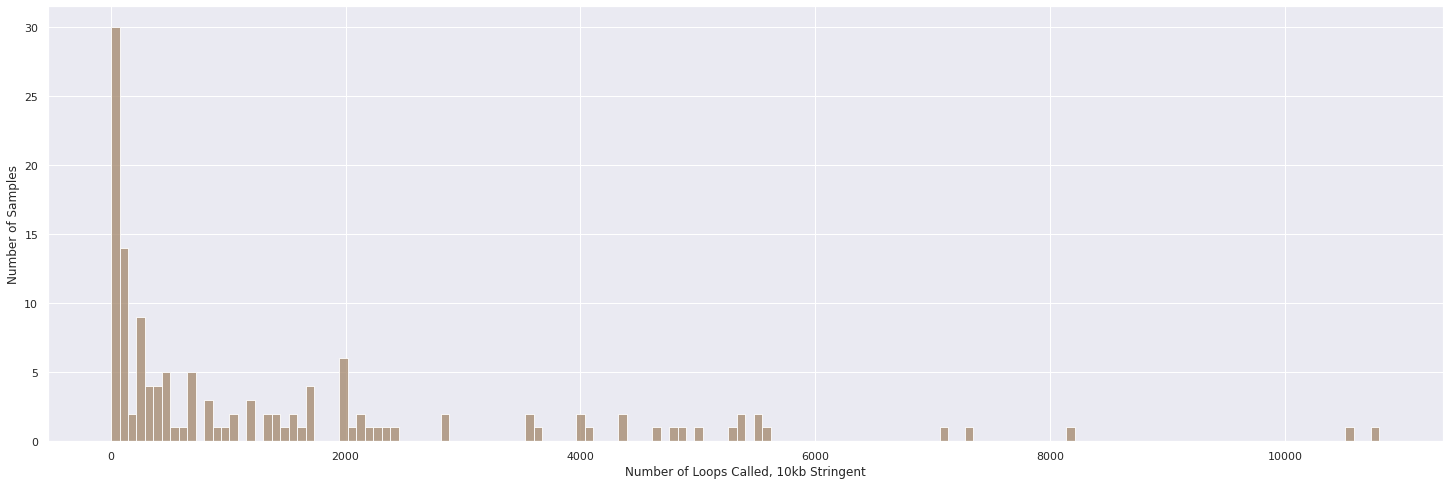

In [56]:
# all samples minus outliers
mouse_no_outliers = get_outliers(mouse_fithichip_good, "S_10kb")
sns.set(rc = {'figure.figsize':(25,8)})
ax = sns.histplot(data=mouse_no_outliers, bins=150, x="S_10kb", color='#A3866A')
ax.set_xlabel('Number of Loops Called, 10kb Stringent')
ax.set_ylabel('Number of Samples')

Samples Report
number of samples kept: 50


Text(0, 0.5, 'Number of Samples')

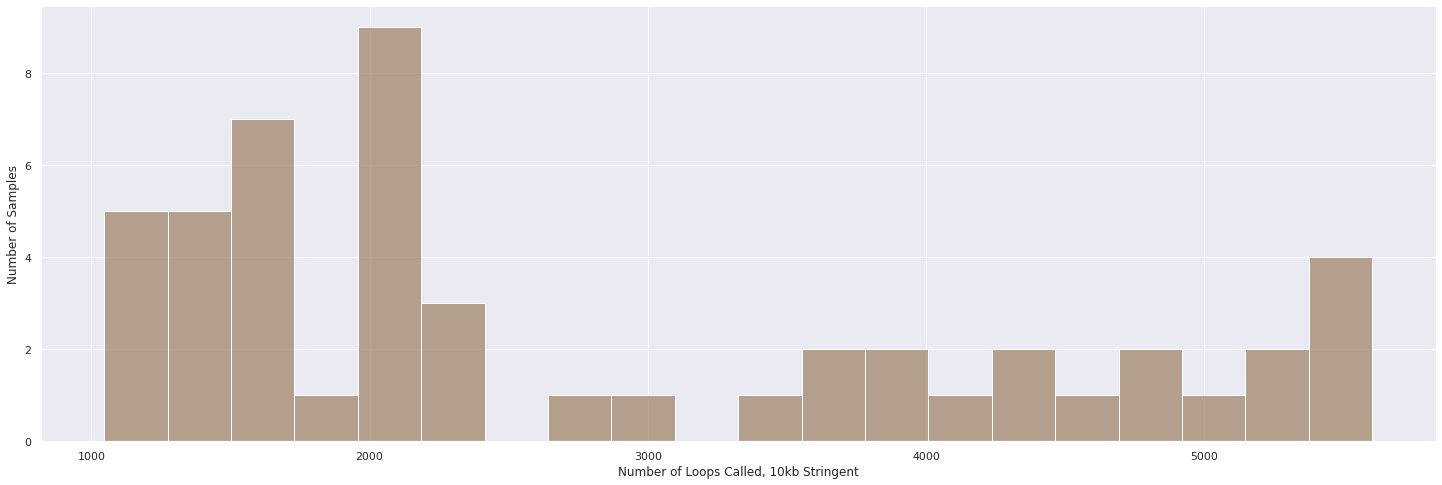

In [57]:
mouse_keep_s = get_samples(mouse_fithichip_good, 1000, 7000, "S_10kb")
sns.set(rc = {'figure.figsize':(25,8)})
ax = sns.histplot(data=mouse_keep_s, bins=20, x="S_10kb", color='#A3866A')
ax.set_xlabel('Number of Loops Called, 10kb Stringent')
ax.set_ylabel('Number of Samples')

Outliers Report
IQR: 20959.0
num_outliers_low: 0
num_outliers_high: 25
percent_total_peaks_that_are_outliers: 15.53 %


Text(0, 0.5, 'Number of Samples')

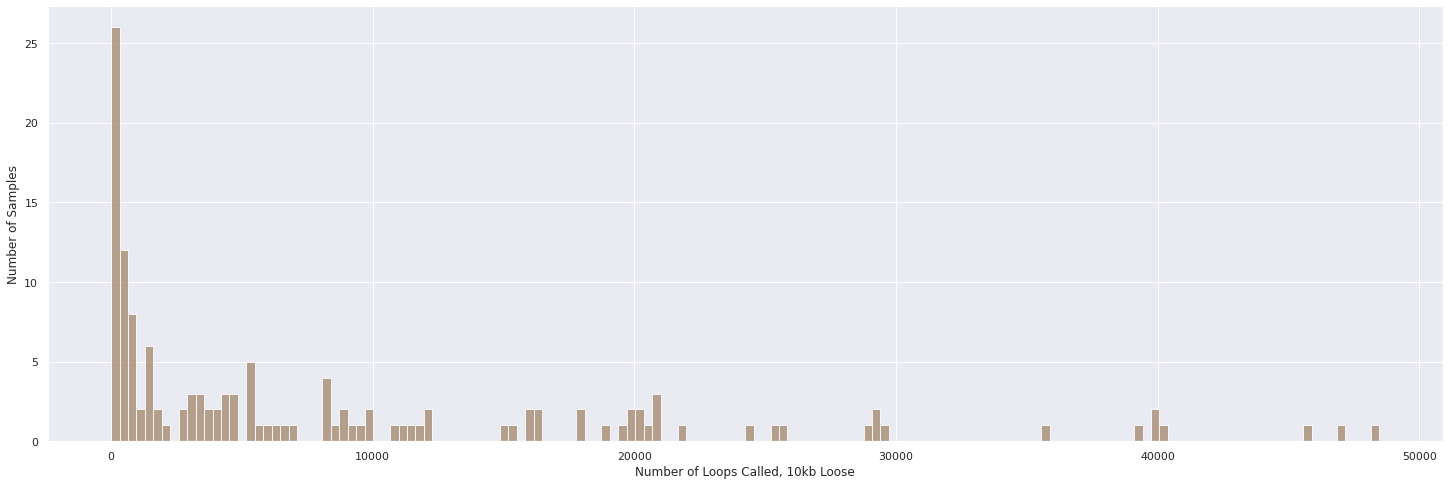

In [58]:
# all samples minus outliers
mouse_no_outliers = get_outliers(mouse_fithichip_good, "L_10kb")
sns.set(rc = {'figure.figsize':(25,8)})
ax = sns.histplot(data=mouse_no_outliers, bins=150, x="L_10kb", color='#A3866A')
ax.set_xlabel('Number of Loops Called, 10kb Loose')
ax.set_ylabel('Number of Samples')

Samples Report
number of samples kept: 49


Text(0, 0.5, 'Number of Samples')

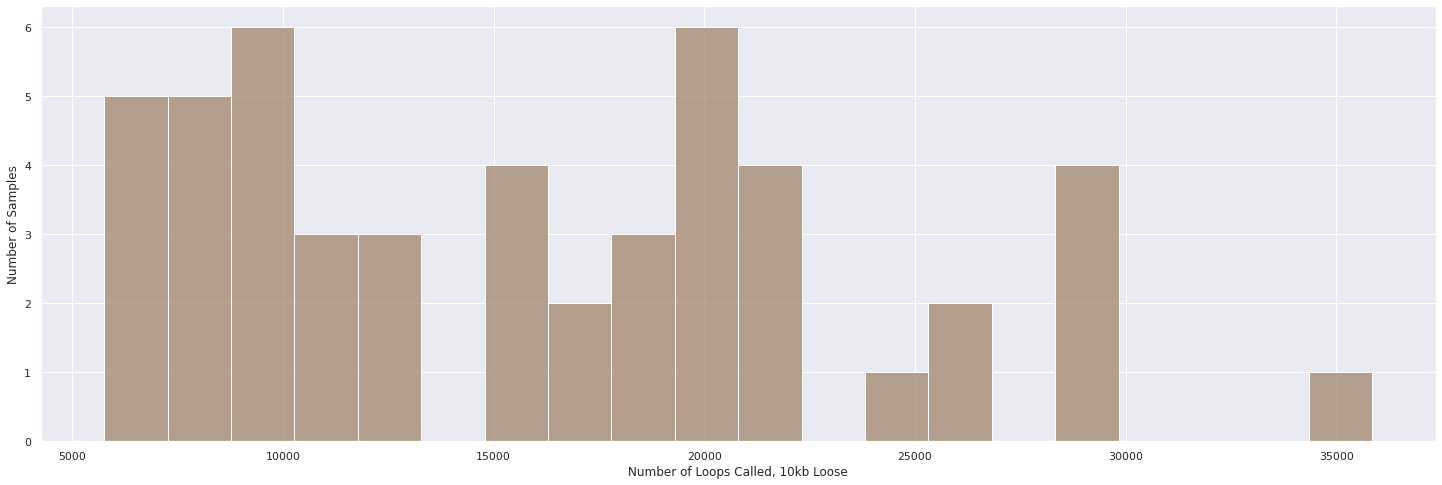

In [59]:
mouse_keep_l = get_samples(mouse_fithichip_good, 5500, 36000, "L_10kb")
sns.set(rc = {'figure.figsize':(25,8)})
ax = sns.histplot(data=mouse_keep_l, bins=20, x="L_10kb", color='#A3866A')
ax.set_xlabel('Number of Loops Called, 10kb Loose')
ax.set_ylabel('Number of Samples')

In [14]:
human_fithichip_cut.describe()

,Peaks,S5kb,L5kb,S10kb,L10kb,S25kb,L25kb
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,147846.500000,9670.284884,28691.319767,13575.069767,42376.511628,20554.901163,55451.000000
std,61216.515764,12527.660389,48126.053155,15393.733963,59039.385652,21109.630903,58497.657401
min,31032.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000
25%,115990.000000,1600.500000,3408.250000,4011.500000,11475.500000,6899.750000,19146.500000
50%,125570.000000,5026.000000,11847.500000,9769.000000,23416.500000,14366.500000,41357.000000
75%,169621.000000,12792.000000,32488.250000,16478.250000,47335.750000,26581.500000,69777.000000
max,260797.000000,76898.000000,319461.000000,93329.000000,385072.000000,133443.000000,355551.000000


In [15]:
print('50%:', human_fithichip_cut['S5kb'].quantile(0.5))
print('55%:', human_fithichip_cut['S5kb'].quantile(0.55))
print('60%:', human_fithichip_cut['S5kb'].quantile(0.6))
print('65%:', human_fithichip_cut['S5kb'].quantile(0.65))
print('70%:', human_fithichip_cut['S5kb'].quantile(0.7))
print('75%:', human_fithichip_cut['S5kb'].quantile(0.75))
print('80%:', human_fithichip_cut['S5kb'].quantile(0.8))
print('85%:', human_fithichip_cut['S5kb'].quantile(0.85))
print('90%:', human_fithichip_cut['S5kb'].quantile(0.9))
print('95%:', human_fithichip_cut['S5kb'].quantile(0.95))
print('100%:', human_fithichip_cut['S5kb'].quantile(1))

50%: 5026.0
55%: 6489.2000000000035
60%: 7968.799999999999
65%: 9384.800000000001
70%: 11541.899999999996
75%: 12792.0
80%: 15090.60000000001
85%: 19950.399999999994
90%: 24474.0
95%: 33803.35
100%: 76898.0


Samples Report
number of samples kept: 50


Text(0, 0.5, 'Number of Samples')

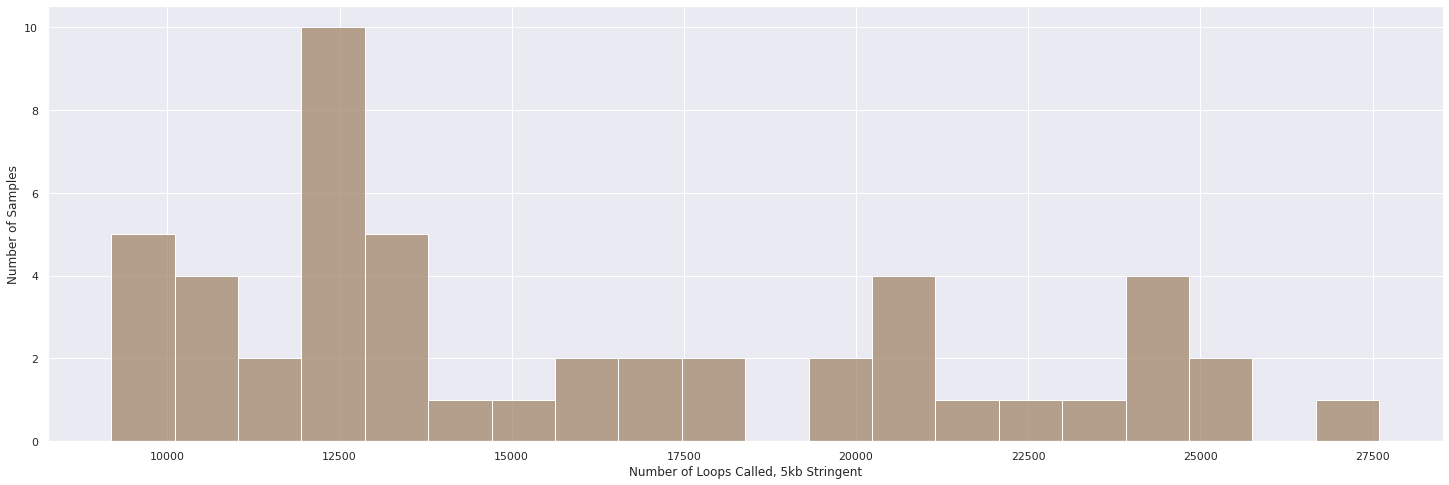

In [25]:
human_fithichip_cut_keep = get_samples(human_fithichip_cut, 9000, 28000, "S5kb")
sns.set(rc = {'figure.figsize':(25,8)})
ax = sns.histplot(data=human_fithichip_cut_keep, bins=20, x="S5kb", color='#A3866A')
ax.set_xlabel('Number of Loops Called, 5kb Stringent')
ax.set_ylabel('Number of Samples')

In [26]:
len(human_fithichip_cut_keep)

50

In [27]:
human_fithichip_cut_keep = human_fithichip_cut_keep.loc[human_fithichip_cut_keep["L5kb"] > 1000].reset_index(drop=True)

In [28]:
len(human_fithichip_cut_keep)

50

In [29]:
human_fithichip_cut_keep

,sample_name,Peaks,S5kb,L5kb,S10kb,L10kb,S25kb,L25kb
0,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,163779.0,12786.0,53896.0,28571.0,110387.0,64184.0,158929.0
1,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,136763.0,16665.0,34918.0,20274.0,48106.0,20019.0,51927.0
2,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,136763.0,13069.0,27075.0,16621.0,39179.0,16922.0,44067.0
3,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,136763.0,12815.0,28151.0,16240.0,40323.0,16044.0,44654.0
4,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,136763.0,12266.0,26963.0,15571.0,39093.0,15531.0,43466.0
5,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,136763.0,24294.0,56941.0,29003.0,74660.0,29089.0,77384.0
6,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,136763.0,21196.0,49332.0,26080.0,66879.0,26330.0,70615.0
7,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,136763.0,19676.0,47762.0,22295.0,60316.0,21134.0,60747.0
8,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,136763.0,16123.0,37379.0,18465.0,49487.0,17674.0,51471.0
9,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,136763.0,25634.0,61366.0,30352.0,79307.0,30982.0,82153.0


In [30]:
samples = human_fithichip_cut_keep["sample_name"].to_list()

In [33]:
samples_list = [s + "_chipseq.peaks" for s in samples]

In [39]:
s = pd.DataFrame(samples_list)
s.to_csv("results/motif_analysis/conserved_anchors/samples_list.txt", header=None, index=False)

In [34]:
" ".join(samples_list)

'Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1_chipseq.peaks CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1_chipseq.peaks CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2_chipseq.peaks CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1_chipseq.peaks CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2_chipseq.peaks CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1_chipseq.peaks CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2_chipseq.peaks CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1_chipseq.peaks CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2_chipseq.peaks CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1_chipseq.peaks CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2_chipseq.peaks CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1_chipseq.peaks CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2_chipseq.peaks CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3_chipseq.peaks CD8_

In [8]:
human_fithichip_k27.describe()

,Peaks,S5,L5,S10,L10,S25,L25
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,141329.023256,9233.372093,26960.482558,12728.546512,39641.656977,19167.000000,52193.883721
std,69882.776480,11498.643322,43033.390812,13578.984313,52312.498939,19368.476738,52896.126702
min,552.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000
25%,115990.000000,1579.500000,3396.500000,3869.000000,11310.000000,6689.250000,18938.750000
50%,123412.000000,4971.000000,11808.500000,8763.000000,23372.500000,14135.500000,39595.000000
75%,169621.000000,12732.000000,29733.000000,16016.000000,43937.750000,26003.000000,63982.500000
max,260797.000000,68567.000000,251175.000000,76460.000000,321542.000000,133443.000000,334449.000000


In [9]:
print('50%:', human_fithichip_k27['S5'].quantile(0.5))
print('55%:', human_fithichip_k27['S5'].quantile(0.55))
print('60%:', human_fithichip_k27['S5'].quantile(0.6))
print('65%:', human_fithichip_k27['S5'].quantile(0.65))
print('70%:', human_fithichip_k27['S5'].quantile(0.7))
print('75%:', human_fithichip_k27['S5'].quantile(0.75))
print('80%:', human_fithichip_k27['S5'].quantile(0.8))
print('85%:', human_fithichip_k27['S5'].quantile(0.85))
print('90%:', human_fithichip_k27['S5'].quantile(0.9))
print('95%:', human_fithichip_k27['S5'].quantile(0.95))
print('100%:', human_fithichip_k27['S5'].quantile(1))

50%: 4971.0
55%: 6273.600000000002
60%: 7750.599999999999
65%: 9017.25
70%: 10638.399999999994
75%: 12732.0
80%: 13496.600000000004
85%: 18769.099999999995
90%: 23288.600000000002
95%: 36355.84999999997
100%: 68567.0


Outliers Report
IQR: 11152.5
Upper Lim: 29460.75
num_outliers_low: 0
num_outliers_high: 11
percent_total_peaks_that_are_outliers: 6.4 %


Text(0, 0.5, 'Number of Samples')

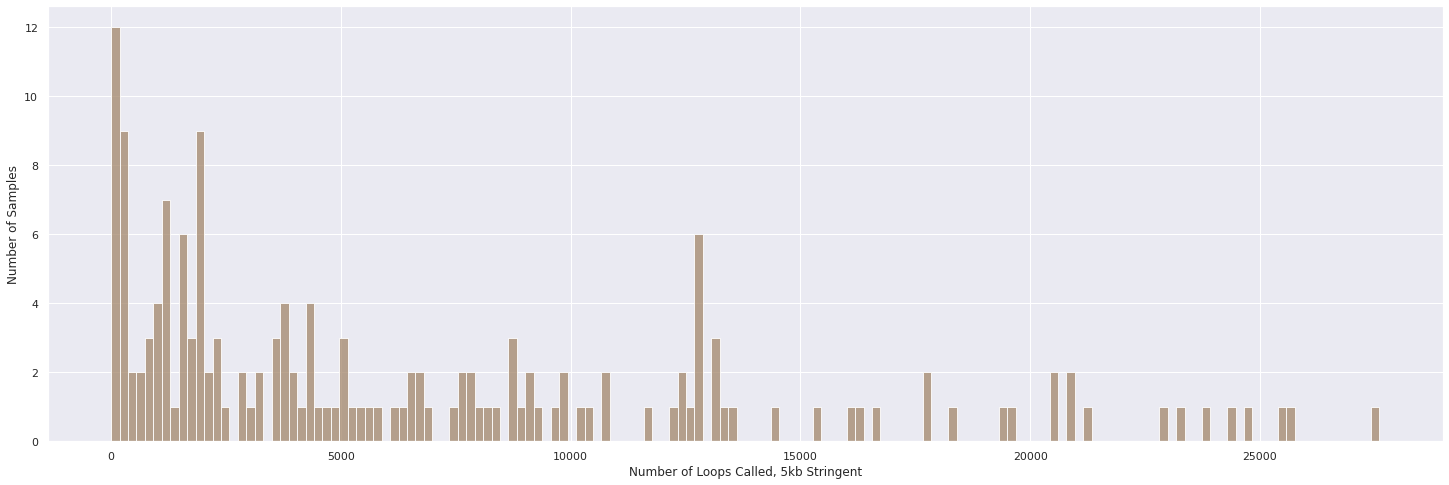

In [13]:
human_fithichip_k27_no_outliers = get_outliers(human_fithichip_k27, "S5")
sns.set(rc = {'figure.figsize':(25,8)})
ax = sns.histplot(data=human_fithichip_k27_no_outliers, bins=150, x="S5", color='#A3866A')
ax.set_xlabel('Number of Loops Called, 5kb Stringent')
ax.set_ylabel('Number of Samples')

In [ ]:
human_fithichip_k27_keep = get_samples(human_fithichip_k27, 9000, 25000, "S5")
sns.set(rc = {'figure.figsize':(25,8)})
ax = sns.histplot(data=human_fithichip_k27_keep, bins=20, x="S5", color='#A3866A')
ax.set_xlabel('Number of Loops Called, 5kb Stringent')
ax.set_ylabel('Number of Samples')

### Human

In [60]:
human_fithichip_good.describe()

,num_peaks,S_5kb,L_5kb,S_10kb,L_10kb,S_25kb,L_25kb
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,38002.099738,10602.839895,50728.309711,19015.286089,72169.669291,34415.286089,90512.942257
std,43358.126898,22763.380226,93553.755504,36514.736572,114848.512233,58909.061815,114405.286095
min,233.000000,1.000000,1.000000,3.000000,19.000000,24.000000,198.000000
25%,7149.000000,68.000000,1108.000000,298.000000,3871.000000,1536.000000,10666.000000
50%,23228.000000,846.000000,8024.000000,2449.000000,17511.000000,13019.000000,40292.000000
75%,53932.000000,11590.000000,55707.000000,24697.000000,94718.000000,44531.000000,139089.000000
max,256996.000000,230390.000000,690130.000000,279581.000000,774957.000000,455215.000000,636330.000000


In [61]:
print('50%:', human_fithichip_good['S_10kb'].quantile(0.5))
print('55%:', human_fithichip_good['S_10kb'].quantile(0.55))
print('60%:', human_fithichip_good['S_10kb'].quantile(0.6))
print('65%:', human_fithichip_good['S_10kb'].quantile(0.65))
print('70%:', human_fithichip_good['S_10kb'].quantile(0.7))
print('75%:', human_fithichip_good['S_10kb'].quantile(0.75))
print('80%:', human_fithichip_good['S_10kb'].quantile(0.8))
print('85%:', human_fithichip_good['S_10kb'].quantile(0.85))
print('90%:', human_fithichip_good['S_10kb'].quantile(0.9))
print('95%:', human_fithichip_good['S_10kb'].quantile(0.95))
print('100%:', human_fithichip_good['S_10kb'].quantile(1))

50%: 2449.0
55%: 5048.000000000003
60%: 8029.0
65%: 11324.0
70%: 17055.0
75%: 24697.0
80%: 31372.0
85%: 40618.0
90%: 51333.0
95%: 79208.0
100%: 279581.0


In [62]:
print('50%:', human_fithichip_good['L_10kb'].quantile(0.5))
print('55%:', human_fithichip_good['L_10kb'].quantile(0.55))
print('60%:', human_fithichip_good['L_10kb'].quantile(0.6))
print('65%:', human_fithichip_good['L_10kb'].quantile(0.65))
print('70%:', human_fithichip_good['L_10kb'].quantile(0.7))
print('75%:', human_fithichip_good['L_10kb'].quantile(0.75))
print('80%:', human_fithichip_good['L_10kb'].quantile(0.8))
print('85%:', human_fithichip_good['L_10kb'].quantile(0.85))
print('90%:', human_fithichip_good['L_10kb'].quantile(0.9))
print('95%:', human_fithichip_good['L_10kb'].quantile(0.95))
print('100%:', human_fithichip_good['L_10kb'].quantile(1))

50%: 17511.0
55%: 24319.00000000001
60%: 33760.0
65%: 52407.0
70%: 67441.0
75%: 94718.0
80%: 135277.0
85%: 169193.0
90%: 218352.0
95%: 298371.0
100%: 774957.0


Outliers Report
IQR: 24399.0
num_outliers_low: 0
num_outliers_high: 27
percent_total_peaks_that_are_outliers: 7.09 %


Text(0, 0.5, 'Number of Samples')

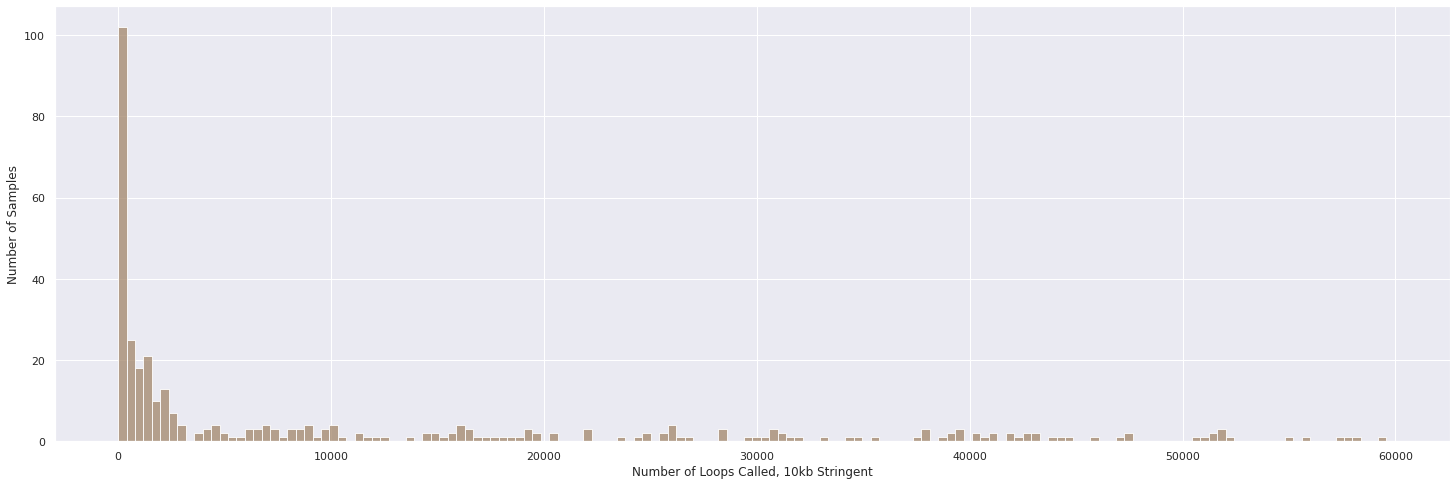

In [63]:
human_no_outliers = get_outliers(human_fithichip_good, "S_10kb")
sns.set(rc = {'figure.figsize':(25,8)})
ax = sns.histplot(data=human_no_outliers, bins=150, x="S_10kb", color='#A3866A')
ax.set_xlabel('Number of Loops Called, 10kb Stringent')
ax.set_ylabel('Number of Samples')

Samples Report
number of samples kept: 118


Text(0, 0.5, 'Number of Samples')

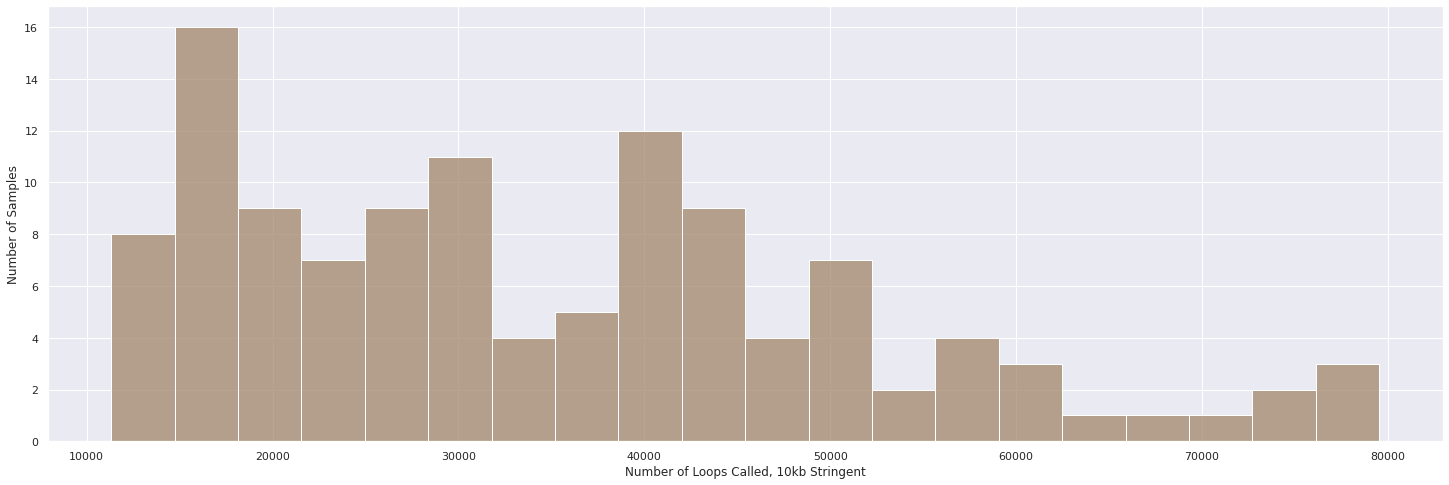

In [64]:
human_keep_s = get_samples(human_fithichip_good, 11000, 80000, "S_10kb")
sns.set(rc = {'figure.figsize':(25,8)})
ax = sns.histplot(data=human_keep_s, bins=20, x="S_10kb", color='#A3866A')
ax.set_xlabel('Number of Loops Called, 10kb Stringent')
ax.set_ylabel('Number of Samples')

Outliers Report
IQR: 90847.0
num_outliers_low: 0
num_outliers_high: 36
percent_total_peaks_that_are_outliers: 9.45 %


Text(0, 0.5, 'Number of Samples')

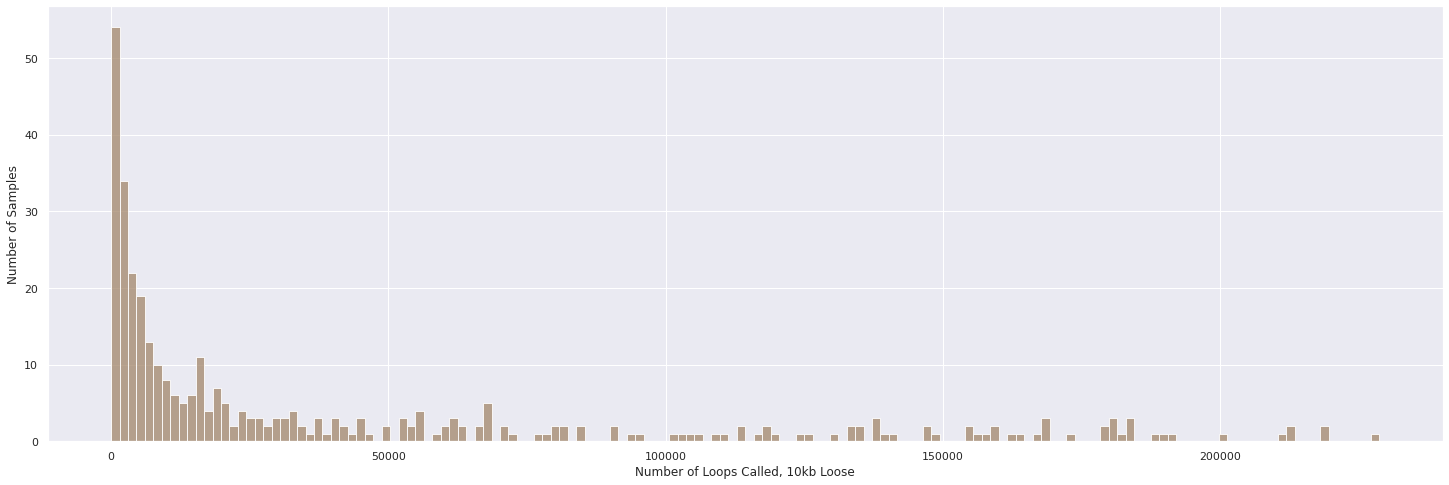

In [65]:
human_no_outliers = get_outliers(human_fithichip_good, "L_10kb")
sns.set(rc = {'figure.figsize':(25,8)})
ax = sns.histplot(data=human_no_outliers, bins=150, x="L_10kb", color='#A3866A')
ax.set_xlabel('Number of Loops Called, 10kb Loose')
ax.set_ylabel('Number of Samples')

In [ ]:
human_keep_l = get_samples(human_fithichip_good, 52000, 250000, "L_10kb")
sns.set(rc = {'figure.figsize':(25,8)})
ax = sns.histplot(data=human_keep_l, bins=20, x="L_10kb", color='#A3866A')
ax.set_xlabel('Number of Loops Called, 10kb Loose')
ax.set_ylabel('Number of Samples')

In [67]:
human_keep_l = human_keep_l.reset_index(drop=True)

In [68]:
human_keep_s = human_keep_s.reset_index(drop=True)

In [69]:
mouse_keep_l = mouse_keep_l.reset_index(drop=True)

In [70]:
mouse_keep_s = mouse_keep_s.reset_index(drop=True)

## A+ Samples

In [71]:
human_keep_s.describe()

,num_peaks,S_5kb,L_5kb,S_10kb,L_10kb,S_25kb,L_25kb
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,66188.652542,19640.796610,105501.864407,34935.771186,147628.076271,61386.644068,174667.194915
std,40219.796788,12472.197491,75931.802777,17105.957869,84992.670265,33136.491748,68483.696412
min,10029.000000,1783.000000,2304.000000,11313.000000,19605.000000,18097.000000,38188.000000
25%,37502.000000,8954.000000,39570.250000,19520.750000,79153.250000,38404.750000,125573.500000
50%,55797.500000,18174.000000,97894.000000,31383.000000,136678.500000,52992.000000,165457.000000
75%,86565.000000,27039.250000,142156.000000,44086.000000,189037.750000,76915.000000,214775.250000
max,256996.000000,57691.000000,342934.000000,79543.000000,431340.000000,181474.000000,378557.000000


In [72]:
human_keep_l.describe()

,num_peaks,S_5kb,L_5kb,S_10kb,L_10kb,S_25kb,L_25kb
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,63435.330435,19712.773913,97744.608696,35863.243478,142043.713043,63116.165217,173734.043478
std,40413.676185,14359.107787,59933.862259,25908.245838,68889.990995,59648.794856,80743.167012
min,9444.000000,3707.000000,6403.000000,6657.000000,52407.000000,13019.000000,65133.000000
25%,34763.500000,8081.000000,41228.000000,17411.500000,79353.500000,33007.500000,113900.000000
50%,51425.000000,17702.000000,95694.000000,31372.000000,135277.000000,47759.000000,159249.000000
75%,88413.500000,26989.500000,137632.500000,44065.000000,183666.000000,72359.000000,212960.500000
max,230349.000000,97695.000000,257642.000000,193754.000000,298371.000000,439477.000000,558355.000000


In [73]:
mouse_keep_s.describe()

,num_peaks,S_5kb,L_5kb,S_10kb,L_10kb,S_25kb,L_25kb
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,26005.300000,588.080000,5485.640000,2821.500000,16795.600000,14976.260000,47817.84000
std,19260.826847,575.736967,5199.164178,1487.263289,10838.509388,8901.185905,24250.12317
min,1888.000000,15.000000,24.000000,1046.000000,2770.000000,3995.000000,11238.00000
25%,12909.500000,195.500000,1166.250000,1619.250000,8514.500000,8856.000000,33350.50000
50%,22452.000000,366.500000,4444.500000,2152.000000,16041.000000,12479.000000,42477.50000
75%,31221.250000,826.750000,7405.750000,4038.000000,20929.750000,20309.250000,57356.00000
max,85206.000000,2885.000000,21621.000000,5604.000000,48474.000000,43772.000000,127112.00000


In [74]:
mouse_keep_l.describe()

,num_peaks,S_5kb,L_5kb,S_10kb,L_10kb,S_25kb,L_25kb
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,22340.163265,607.755102,4995.897959,2910.061224,15989.000000,14018.530612,45640.836735
std,14431.409326,643.478617,3486.164286,2686.741532,7526.772621,13358.369675,25875.595208
min,4016.000000,102.000000,198.000000,328.000000,5757.000000,1850.000000,17038.000000
25%,12490.000000,173.000000,2334.000000,1227.000000,9216.000000,5408.000000,28761.000000
50%,20699.000000,340.000000,4101.000000,2058.000000,15959.000000,10882.000000,38411.000000
75%,29073.000000,826.000000,6844.000000,3993.000000,20627.000000,17002.000000,55440.000000
max,85206.000000,3096.000000,14598.000000,16472.000000,35855.000000,79952.000000,132926.000000


In [75]:
human_keep_s_no_outliers = get_outliers(human_keep_s, "S_10kb")

Outliers Report
IQR: 24565.25
num_outliers_low: 0
num_outliers_high: 0
percent_total_peaks_that_are_outliers: 0.0 %


In [76]:
human_keep_l_no_outliers = get_outliers(human_keep_l, "L_10kb")

Outliers Report
IQR: 104312.5
num_outliers_low: 0
num_outliers_high: 0
percent_total_peaks_that_are_outliers: 0.0 %


In [77]:
mouse_keep_s_no_outliers = get_outliers(mouse_keep_s, "S_10kb")

Outliers Report
IQR: 2418.75
num_outliers_low: 0
num_outliers_high: 0
percent_total_peaks_that_are_outliers: 0.0 %


In [78]:
mouse_keep_l_no_outliers = get_outliers(mouse_keep_l, "L_10kb")

Outliers Report
IQR: 11411.0
num_outliers_low: 0
num_outliers_high: 0
percent_total_peaks_that_are_outliers: 0.0 %


In [130]:
mouse_keep_s.to_excel('mouse_10kb_s.xlsx')

## Check with FastQC

In [111]:
human_keep_s_with_fastqc = human_keep_s.merge(human_fastqc, on='sample_name')
human_keep_l_with_fastqc = human_keep_l.merge(human_fastqc, on='sample_name')

In [112]:
mouse_keep_s_with_fastqc = mouse_keep_s.merge(mouse_fastqc, on='sample_name')
mouse_keep_l_with_fastqc = mouse_keep_l.merge(mouse_fastqc, on='sample_name')

In [113]:
human_keep_s_with_fastqc

,sample_name,num_peaks,S_5kb,L_5kb,S_10kb,L_10kb,S_25kb,L_25kb,Test,Basic Statistics,Per base sequence quality,Per tile sequence quality,Per sequence quality scores,Per base sequence content,Per sequence GC content,Per base N content,Sequence Length Distribution,Sequence Duplication Levels,Overrepresented sequences,Adapter Content
0,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,60295,3514,11200,11313,34768,33321,79208,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,WARNWARN,FAILFAIL,PASSPASS,PASSPASS
1,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b2,64130,9386,34312,22055,71108,50264,117067,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,WARNWARN,PASSPASS,WARNWARN
2,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,210112,17972,58846,40992,117544,88172,165135,good,PASSPASS,PASSPASS,0,PASSPASS,WARNWARN,PASSPASS,PASSPASS,PASSPASS,FAILFAIL,PASSPASS,WARNWARN
3,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.b1,47522,16643,185783,31394,245152,47759,239726,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,FAILWARN,PASSPASS,PASSPASS
4,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.b2,38994,7023,82228,16303,133063,32733,165779,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,WARNWARN,PASSPASS,PASSPASS
5,CAR-T-HA-D10.GSE168881.Homo_Sapiens.H3K27ac.b1,58070,21135,237899,41959,306998,59155,285869,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,WARNFAIL,PASSPASS,PASSPASS
6,CAR-T-HA-D10.GSE168881.Homo_Sapiens.H3K27ac.b2,54088,25934,275236,47080,335763,62736,301249,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,FAILWARN,PASSPASS,PASSPASS
7,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,27535,13163,96362,24664,138958,47152,167583,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,WARNWARN,PASSPASS,PASSPASS,WARNWARN,PASSPASS,PASSPASS
8,CUTLL1.GSE115896.Homo_Sapiens.H3K27ac.b1,26927,11275,109015,17310,133822,24749,134651,good,PASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASS,0,PASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASS
9,Caudate.GSE147672.Homo_Sapiens.H3K27ac.b1,87067,7785,25616,28226,85135,77593,187724,good,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,0,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,FAILFAILFAILFAILFAILFAILFAILFAILFAILFAILFAILFAILFAILFAILFAILFAIL,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS


In [114]:
human_keep_l_with_fastqc

,sample_name,num_peaks,S_5kb,L_5kb,S_10kb,L_10kb,S_25kb,L_25kb,Test,Basic Statistics,Per base sequence quality,Per tile sequence quality,Per sequence quality scores,Per base sequence content,Per sequence GC content,Per base N content,Sequence Length Distribution,Sequence Duplication Levels,Overrepresented sequences,Adapter Content
0,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b2,64130,9386,34312,22055,71108,50264,117067,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,WARNWARN,PASSPASS,WARNWARN
1,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,210112,17972,58846,40992,117544,88172,165135,good,PASSPASS,PASSPASS,0,PASSPASS,WARNWARN,PASSPASS,PASSPASS,PASSPASS,FAILFAIL,PASSPASS,WARNWARN
2,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.b1,47522,16643,185783,31394,245152,47759,239726,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,FAILWARN,PASSPASS,PASSPASS
3,CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.b2,38994,7023,82228,16303,133063,32733,165779,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,WARNWARN,PASSPASS,PASSPASS
4,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,27535,13163,96362,24664,138958,47152,167583,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,WARNWARN,PASSPASS,PASSPASS,WARNWARN,PASSPASS,PASSPASS
5,CUTLL1.GSE115896.Homo_Sapiens.H3K27ac.b1,26927,11275,109015,17310,133822,24749,134651,good,PASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASS,0,PASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASS
6,Caudate.GSE147672.Homo_Sapiens.H3K27ac.b1,87067,7785,25616,28226,85135,77593,187724,good,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,0,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,FAILFAILFAILFAILFAILFAILFAILFAILFAILFAILFAILFAILFAILFAILFAILFAIL,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS
7,Caudate.GSE147672.Homo_Sapiens.H3K27ac.b2,121965,12511,38088,37946,105002,88576,199093,good,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,0,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,FAILFAILFAILFAILFAILFAILFAILFAILFAILFAILFAILFAILFAILFAILFAILFAIL,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS,PASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASSPASS
8,DMS273.GSE151001.Homo_Sapiens.H3K27ac.b1,45726,4541,34862,8421,56057,15376,75504,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,WARNWARN,PASSPASS,PASSPASS,PASSPASS,PASSPASS,PASSPASS
9,DND41-Resistant.GSE173871.Homo_Sapiens.SMC1A.b1,230349,36055,55707,141370,218926,439477,558355,good,PASSPASS,PASSPASS,PASSPASS,PASSPASS,FAILFAIL,WARNWARN,PASSPASS,WARNWARN,FAILFAIL,PASSPASS,PASSPASS


In [115]:
mouse_keep_s_with_fastqc

,sample_name,num_peaks,S_5kb,L_5kb,S_10kb,L_10kb,S_25kb,L_25kb,Test,Basic Statistics,Per base sequence quality,Per tile sequence quality,Per sequence quality scores,Per base sequence content,Per sequence GC content,Per base N content,Sequence Length Distribution,Sequence Duplication Levels,Overrepresented sequences,Adapter Content
0,Adult_CTX_SSTcre.GSE150536.Mus_Musculus.H3K27ac.b1,27496.0,501.0,4469.0,3650.0,20627.0,18086.0,59076.0,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,WARNWARN,PASSPASS,WARNWARN,FAILFAIL,FAILFAIL,PASSPASS
1,Adult_CTX_VIPcre.GSE150536.Mus_Musculus.H3K27ac.b1,34641.0,736.0,4805.0,4364.0,20299.0,19698.0,58541.0,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,WARNWARN,PASSPASS,WARNWARN,FAILFAIL,FAILFAIL,PASSPASS
2,Adult_CTX_VIPcre.GSE150536.Mus_Musculus.H3K27ac.b2,32096.0,1095.0,6871.0,5604.0,25800.0,23175.0,68403.0,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,WARNWARN,PASSPASS,WARNWARN,FAILFAIL,FAILFAIL,PASSPASS
3,BL6_CD4_CD8.GSE141847.Mus_Musculus.H3K27ac.b1,5514.0,113.0,1660.0,1728.0,12062.0,11400.0,45345.0,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,WARNWARN,WARNWARN,PASSPASS,PASSPASS
4,BL6_CD4_CD8.GSE141847.Mus_Musculus.H3K27ac.b2,21307.0,153.0,574.0,5534.0,19678.0,40561.0,127112.0,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,WARNWARN,WARNWARN,PASSPASS,PASSPASS
5,BL6_CD4_CD8.GSE141847.Mus_Musculus.SMC1A.b2,7117.0,477.0,795.0,4994.0,8966.0,28005.0,45087.0,good,PASSPASSPASSPASS,PASSPASSPASSPASS,0,PASSPASSPASSPASS,FAILFAILFAILFAIL,PASSWARNPASSPASS,PASSPASSPASSPASS,WARNWARNWARNWARN,WARNWARNWARNWARN,WARNFAILPASSPASS,PASSPASSPASSPASS
6,BMDM_24hIL4.GSE159629.Mus_Musculus.H3K4me3.b1,40078.0,1507.0,11871.0,4344.0,25474.0,10456.0,38411.0,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,FAILFAIL,PASSPASS,PASSPASS
7,BMDM_24hIL4.GSE159629.Mus_Musculus.H3K4me3.b2,31580.0,318.0,2554.0,2374.0,10956.0,14645.0,37375.0,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,WARNWARN,WARNPASS,PASSPASS
8,BMDM_Basal.GSE159629.Mus_Musculus.H3K4me3.b1,32824.0,274.0,2616.0,1220.0,8364.0,4504.0,17865.0,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,FAILFAIL,PASSPASS,PASSPASS
9,BMDM_Basal.GSE159629.Mus_Musculus.H3K4me3.b2,36844.0,232.0,1759.0,2016.0,8246.0,14921.0,34936.0,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,PASSPASS,WARNPASS,PASSPASS


In [116]:
mouse_keep_l_with_fastqc

,sample_name,num_peaks,S_5kb,L_5kb,S_10kb,L_10kb,S_25kb,L_25kb,Test,Basic Statistics,Per base sequence quality,Per tile sequence quality,Per sequence quality scores,Per base sequence content,Per sequence GC content,Per base N content,Sequence Length Distribution,Sequence Duplication Levels,Overrepresented sequences,Adapter Content
0,Adult_CTX_SSTcre.GSE150536.Mus_Musculus.H3K27ac.b1,27496.0,501.0,4469.0,3650.0,20627.0,18086.0,59076.0,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,WARNWARN,PASSPASS,WARNWARN,FAILFAIL,FAILFAIL,PASSPASS
1,Adult_CTX_VIPcre.GSE150536.Mus_Musculus.H3K27ac.b1,34641.0,736.0,4805.0,4364.0,20299.0,19698.0,58541.0,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,WARNWARN,PASSPASS,WARNWARN,FAILFAIL,FAILFAIL,PASSPASS
2,Adult_CTX_VIPcre.GSE150536.Mus_Musculus.H3K27ac.b2,32096.0,1095.0,6871.0,5604.0,25800.0,23175.0,68403.0,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,WARNWARN,PASSPASS,WARNWARN,FAILFAIL,FAILFAIL,PASSPASS
3,BL6_CD4_CD8.GSE141847.Mus_Musculus.H3K27ac.b1,5514.0,113.0,1660.0,1728.0,12062.0,11400.0,45345.0,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,WARNWARN,WARNWARN,PASSPASS,PASSPASS
4,BL6_CD4_CD8.GSE141847.Mus_Musculus.H3K27ac.b2,21307.0,153.0,574.0,5534.0,19678.0,40561.0,127112.0,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,WARNWARN,WARNWARN,PASSPASS,PASSPASS
5,BL6_CD4_CD8.GSE141847.Mus_Musculus.SMC1A.b1,27467.0,1393.0,2268.0,16472.0,29390.0,79952.0,132926.0,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,WARNWARN,WARNWARN,PASSWARN,PASSPASS
6,BL6_CD4_CD8.GSE141847.Mus_Musculus.SMC1A.b2,7117.0,477.0,795.0,4994.0,8966.0,28005.0,45087.0,good,PASSPASSPASSPASS,PASSPASSPASSPASS,0,PASSPASSPASSPASS,FAILFAILFAILFAIL,PASSWARNPASSPASS,PASSPASSPASSPASS,WARNWARNWARNWARN,WARNWARNWARNWARN,WARNFAILPASSPASS,PASSPASSPASSPASS
7,BMDM_24hIL4.GSE159629.Mus_Musculus.H3K4me3.b1,40078.0,1507.0,11871.0,4344.0,25474.0,10456.0,38411.0,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,FAILFAIL,PASSPASS,PASSPASS
8,BMDM_24hIL4.GSE159629.Mus_Musculus.H3K4me3.b2,31580.0,318.0,2554.0,2374.0,10956.0,14645.0,37375.0,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,WARNWARN,WARNPASS,PASSPASS
9,BMDM_Basal.GSE159629.Mus_Musculus.H3K4me3.b1,32824.0,274.0,2616.0,1220.0,8364.0,4504.0,17865.0,good,PASSPASS,PASSPASS,0,PASSPASS,FAILFAIL,PASSPASS,PASSPASS,PASSPASS,FAILFAIL,PASSPASS,PASSPASS


# Prioritize for Motif Analysis Prototype

In [15]:
human_fithichip_k27_keep = human_fithichip_k27_keep.reset_index(drop=True)

In [16]:
human_fithichip_k27_keep

,sample_name,Peaks,S5,L5,S10,L10,S25,L25
0,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,163779.0,12786.0,53896.0,28571.0,110387.0,64184.0,158929.0
1,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,136763.0,16665.0,34918.0,20274.0,48106.0,20019.0,51927.0
2,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,136763.0,13069.0,27075.0,16621.0,39179.0,16922.0,44067.0
3,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,136763.0,12815.0,28151.0,16240.0,40323.0,16044.0,44654.0
4,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,136763.0,12266.0,26963.0,15571.0,39093.0,15531.0,43466.0
5,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,136763.0,24294.0,56941.0,29003.0,74660.0,29089.0,77384.0
6,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,136763.0,21196.0,49332.0,26080.0,66879.0,26330.0,70615.0
7,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,136763.0,19676.0,47762.0,22295.0,60316.0,21134.0,60747.0
8,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,136763.0,16123.0,37379.0,18465.0,49487.0,17674.0,51471.0
9,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,136763.0,25634.0,61366.0,30352.0,79307.0,30982.0,82153.0


In [17]:
human_fithichip_k27_keep.describe()

,Peaks,S5,L5,S10,L10,S25,L25
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,142953.080000,16129.400000,43964.560000,19967.320000,59384.16000,22288.380000,64726.460000
std,73571.414178,5554.549821,24602.998735,6746.503356,30921.92948,11491.646462,34141.769571
min,13491.000000,9149.000000,14982.000000,8843.000000,13459.00000,3345.000000,9615.000000
25%,115990.000000,12385.750000,25952.750000,15305.000000,37266.00000,16095.000000,42613.250000
50%,136763.000000,13403.000000,37722.500000,17635.000000,48726.00000,19056.500000,51862.000000
75%,226303.500000,20551.500000,53843.000000,24938.250000,70715.00000,26256.500000,77153.750000
max,260797.000000,29536.000000,120600.000000,37467.000000,151964.00000,68844.000000,158929.000000


In [18]:
human_fithichip_k27_keep["pos"] = human_fithichip_k27_keep.sample_name.str.find(".")
human_fithichip_k27_keep['cell_type_1'] = human_fithichip_k27_keep.apply(lambda x: x['sample_name'][0:x['pos']],axis=1)

In [19]:
human_fithichip_k27_keep

,sample_name,Peaks,S5,L5,S10,L10,S25,L25,pos,cell_type_1
0,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,163779.0,12786.0,53896.0,28571.0,110387.0,64184.0,158929.0,10,Aortic-VIC
1,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,136763.0,16665.0,34918.0,20274.0,48106.0,20019.0,51927.0,19,CD4_Naive_1800-RH-1
2,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,136763.0,13069.0,27075.0,16621.0,39179.0,16922.0,44067.0,19,CD4_Naive_1800-RH-1
3,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,136763.0,12815.0,28151.0,16240.0,40323.0,16044.0,44654.0,19,CD4_Naive_1814-RH-1
4,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,136763.0,12266.0,26963.0,15571.0,39093.0,15531.0,43466.0,19,CD4_Naive_1814-RH-1
5,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,136763.0,24294.0,56941.0,29003.0,74660.0,29089.0,77384.0,19,CD4_Naive_1815-RH-1
6,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,136763.0,21196.0,49332.0,26080.0,66879.0,26330.0,70615.0,19,CD4_Naive_1815-RH-1
7,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,136763.0,19676.0,47762.0,22295.0,60316.0,21134.0,60747.0,19,CD4_Naive_1816-RH-1
8,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2,136763.0,16123.0,37379.0,18465.0,49487.0,17674.0,51471.0,19,CD4_Naive_1816-RH-1
9,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,136763.0,25634.0,61366.0,30352.0,79307.0,30982.0,82153.0,19,CD4_Naive_1829-RH-1


In [20]:
samples = human_fithichip_k27_keep["sample_name"].to_list()

In [21]:
samples_list = [s + "_chipseq.peaks" for s in samples]

In [22]:
" ".join(samples_list)

'Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1_chipseq.peaks CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1_chipseq.peaks CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2_chipseq.peaks CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1_chipseq.peaks CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2_chipseq.peaks CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1_chipseq.peaks CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2_chipseq.peaks CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1_chipseq.peaks CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2_chipseq.peaks CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1_chipseq.peaks CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2_chipseq.peaks CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1_chipseq.peaks CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b2_chipseq.peaks CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b3_chipseq.peaks CD8_

In [361]:
anchors = "biorep_merged/results/motif_analysis/meme/conserved_anchors_sea/a_plus/anchors.sorted.uniq.final.txt"
anchors_sums = "biorep_merged/results/motif_analysis/meme/conserved_anchors_sea/a_plus/anchors_sums.txt"

In [362]:
sum_dict = {}

In [363]:
with open(anchors) as f:
    for line in f:
        sum_dict["_".join(line.strip().split("\t")).split("_a")[0]] = [0, 0]

In [364]:
print(len(sum_dict))

116862


In [365]:
with open(anchors_sums) as f:
    for line in f:
        if "Homo" in line: 
            sample_name = line.strip().split("/")[4]
        else:
            info = line.strip().split("\t")
            anchor = info[0] + "_" + info[1] + "_" + info[2]
            count = int(info[3])
            if count != 0:
                sum_dict[anchor][0] += 1
                sum_dict[anchor][1] += count

In [366]:
print(len(sum_dict))

116862


In [367]:
df = pd.DataFrame.from_dict(sum_dict, orient="index")
df.columns = ["number_of_samples_with_anchor", "total_count_across_all_samples"]

In [368]:
df

,number_of_samples_with_anchor,total_count_across_all_samples
chr1_775000_780000,7,7
chr1_820000_825000,6,6
chr1_825000_830000,1,1
chr1_840000_845000,1,1
chr1_955000_960000,1,2
...,...,...
chr9_137790000_137795000,1,1
chr9_137820000_137825000,2,2
chr9_137830000_137835000,1,1
chr9_137950000_137955000,1,1


In [369]:
df.describe()

,number_of_samples_with_anchor,total_count_across_all_samples
count,116862.000000,116862.000000
mean,7.250432,21.956855
std,7.741102,68.912257
min,1.000000,1.000000
25%,1.000000,2.000000
50%,4.000000,5.000000
75%,10.000000,15.000000
max,30.000000,2967.000000


In [203]:
values = list(sum_dict.values())
sample_counts = []
anchor_counts = []
for v in values:
    sample_counts.append(v[0])
    anchor_counts.append(v[1]) 

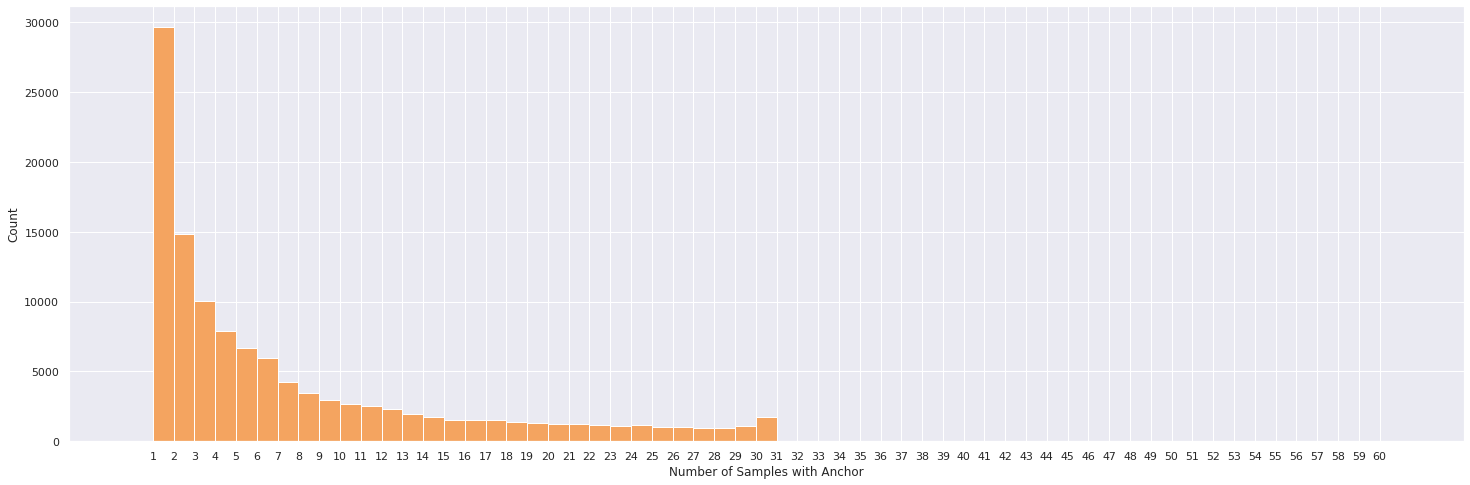

In [177]:
sns.set(rc = {'figure.figsize':(25,8)})
plt.hist(df["number_of_samples_with_anchor"], range=(0,61), bins=61, color="sandybrown")
plt.xlabel("Number of Samples with Anchor")
plt.ylabel("Count")
plt.xticks(range(1, 61))
plt.show()

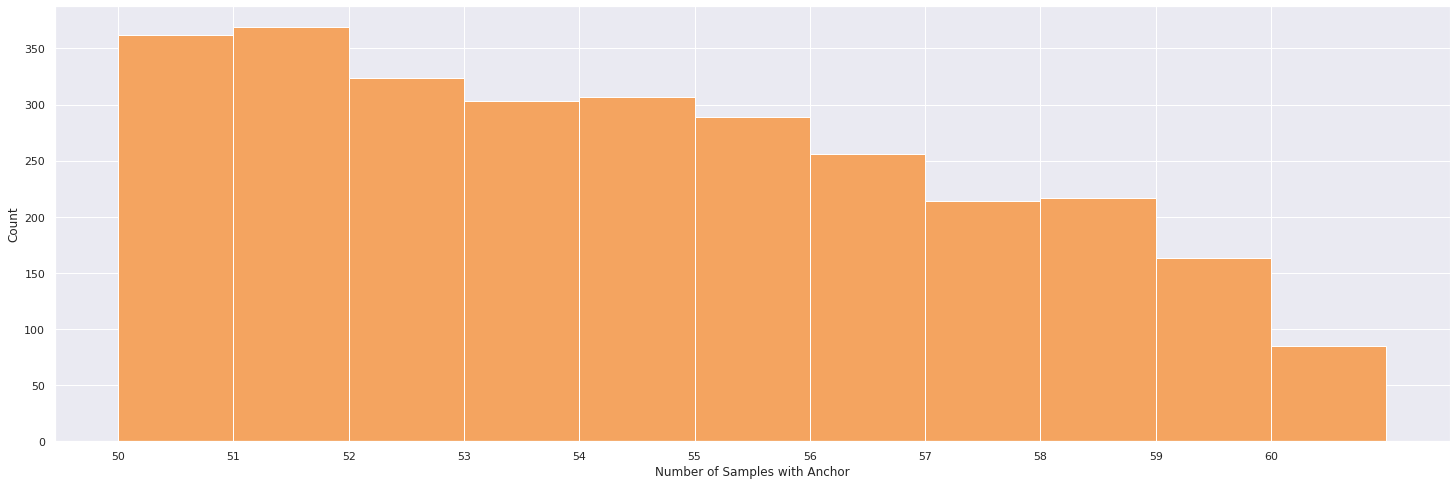

In [74]:
plt.hist(df.loc[df["number_of_samples_with_anchor"] >= 50]["number_of_samples_with_anchor"], range=(50,61), bins=[50,51,52,53,54,55,56,57,58,59,60,61], color="sandybrown")
plt.xlabel("Number of Samples with Anchor")
plt.ylabel("Count")
plt.xticks(range(50, 61))
plt.show()

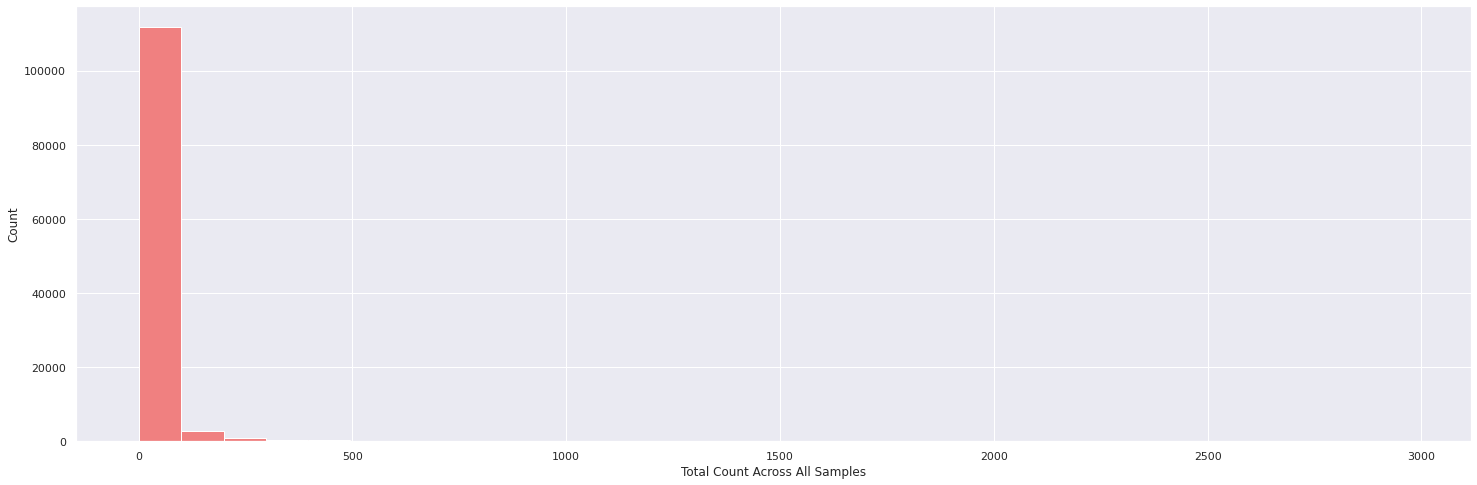

In [36]:
plt.hist(df["total_count_across_all_samples"], bins=30, color="lightcoral")
plt.xlabel("Total Count Across All Samples")
plt.ylabel("Count")
#plt.xticks(range(1, 51))
plt.show()

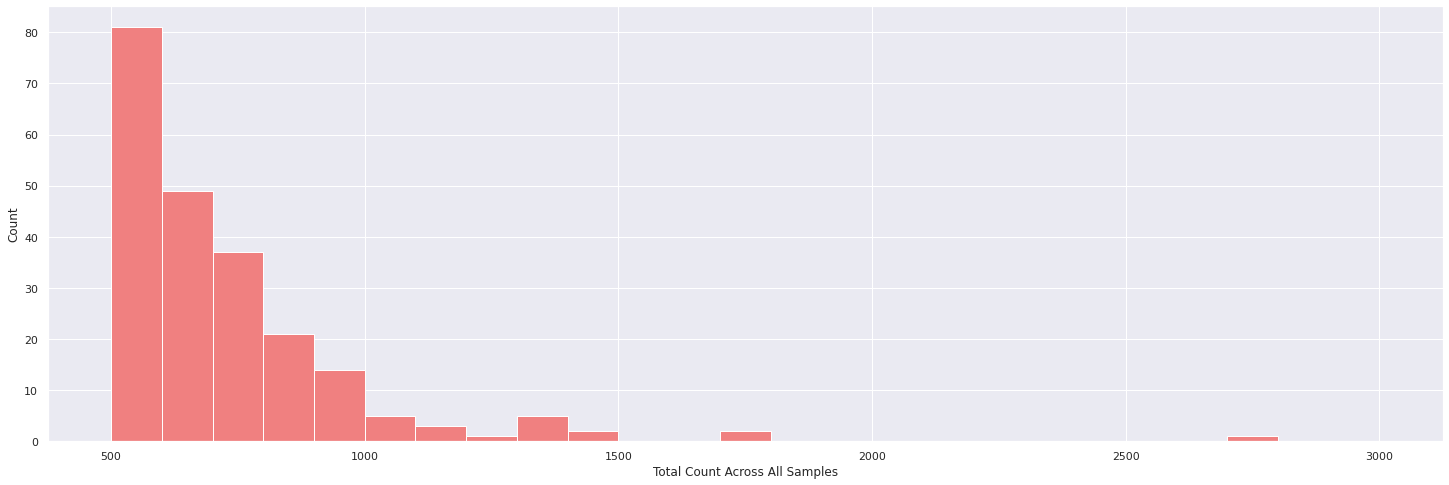

In [63]:
plt.hist(df["total_count_across_all_samples"], bins=25, range=(500, 3000), color="lightcoral")
plt.xlabel("Total Count Across All Samples")
plt.ylabel("Count")
#plt.xticks(range(1, 51))
plt.show()

In [76]:
len(df.sort_values(by="total_count_across_all_samples", ascending = False).loc[df["number_of_samples_with_anchor"] >= 54])

1531

In [77]:
len(df.sort_values(by="total_count_across_all_samples", ascending = False).loc[df["number_of_samples_with_anchor"] == 60].loc[df["total_count_across_all_samples"] > 1000])

35

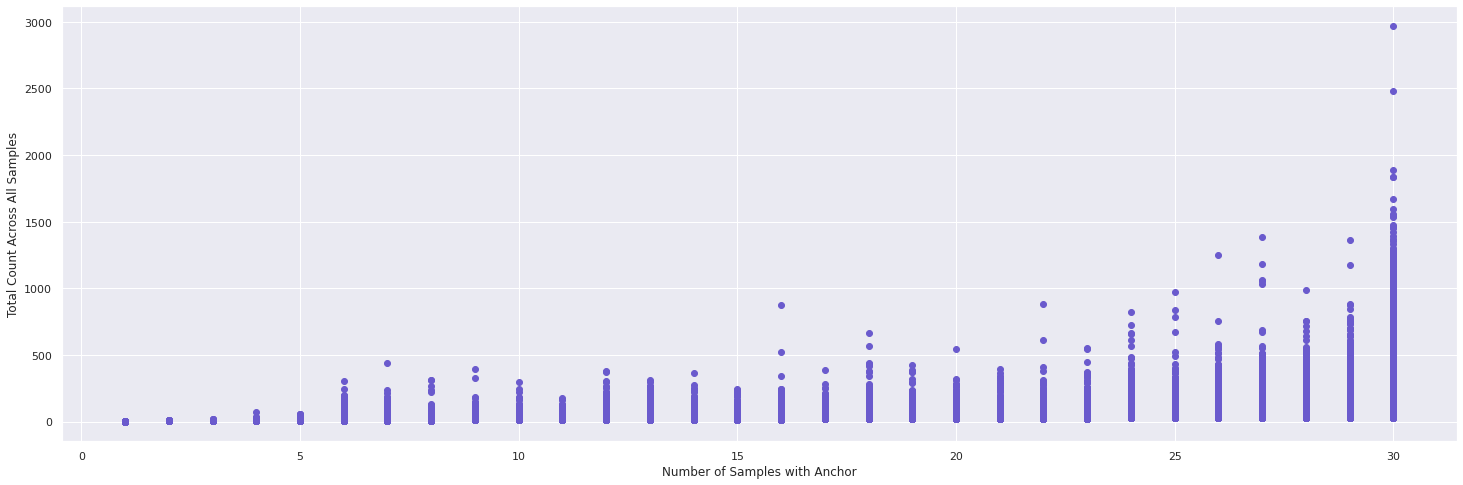

In [38]:
plt.scatter(df["number_of_samples_with_anchor"], df["total_count_across_all_samples"], color="slateblue")
plt.xlabel("Number of Samples with Anchor")
plt.ylabel("Total Count Across All Samples")
#plt.xticks(range(1, 51))
plt.show()

In [213]:
thres = df.sort_values(by="total_count_across_all_samples").loc[df["number_of_samples_with_anchor"] == 60].loc[df["total_count_across_all_samples"] >=1000]

In [214]:
len(thres)

35

In [215]:
thres

,number_of_samples_with_anchor,total_count_across_all_samples
chr19_54445000_54450000,60,1002
chr17_50865000_50870000,60,1011
chr18_9135000_9140000,60,1012
chr1_45010000_45015000,60,1014
chr2_70085000_70090000,60,1026
chr17_7570000_7575000,60,1039
chr19_14135000_14140000,60,1042
chr8_37735000_37740000,60,1051
chr19_2060000_2065000,60,1053
chr20_37525000_37530000,60,1097


In [207]:
file = "biorep_merged/results/motif_analysis/meme/conserved_anchors_sea/combined/sea_out/conserved_anchors.bed"
anchors = list(thres.index.values)
with open(file, "w") as f:
    for anchor in anchors:
        string = "\t".join(anchor.strip().split("_"))
        f.write(string + "\n")

In [216]:
thres['anchor'] = thres.index

In [218]:
thres = thres.reset_index(drop=True)

In [220]:
first_column = thres.pop('anchor')
thres.insert(0, 'anchor', first_column)

In [226]:
thres = thres.sort_values(by=["total_count_across_all_samples"], ascending=False).reset_index(drop=True)
thres.columns = ["anchor", "num_samples_with_anchor", "num_occurences_across_all_samples"]

In [227]:
thres

,anchor,num_samples_with_anchor,num_occurences_across_all_samples
0,chr8_100950000_100955000,60,4239
1,chr1_234610000_234615000,60,3181
2,chr10_3780000_3785000,60,2812
3,chr1_234605000_234610000,60,2433
4,chr4_102825000_102830000,60,1909
5,chr11_117095000_117100000,60,1874
6,chr1_112615000_112620000,60,1812
7,chr5_134370000_134375000,60,1782
8,chr3_136750000_136755000,60,1715
9,chr12_12715000_12720000,60,1677


In [351]:
name = "A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.biorep_merged"
name = "Hela-S3-OE.GSE108869.Homo_Sapiens.CTCF.biorep_merged"
name = "HeLa-S3-shBHLHE40.GSE137849.Homo_Sapiens.CTCF.biorep_merged"
name = "HeLa-S3-shcontrol.GSE137849.Homo_Sapiens.CTCF.biorep_merged"
name = "NSD2-High-NTKO.GSE131651.Homo_Sapiens.CTCF.biorep_merged"
name = "NSD2-Low-TKO.GSE131651.Homo_Sapiens.CTCF.biorep_merged"
name = "OCI-AML3-WT.GSE111537.Homo_Sapiens.CTCF.biorep_merged"

In [352]:
fimo = "biorep_merged/results/motif_analysis/meme/fimo/ctcf_test/{n}/fimo_out_jaspar/fimo.tsv".format(n = name)

In [353]:
print(glob.glob(fimo))

['biorep_merged/results/motif_analysis/meme/fimo/ctcf_test/OCI-AML3-WT.GSE111537.Homo_Sapiens.CTCF.biorep_merged/fimo_out_jaspar/fimo.tsv']


In [354]:
motifs = {}
for file in glob.glob(fimo):

    #sample_name = file.split('/')[6]
    #motifs[sample_name] = {}
    
    with open(file) as f:
        for line in f:            
            if "MA" in line:
                info = line.strip().split("\t")
                if info[1] not in motifs.keys():
                    motifs[info[1]] = 1
                else:
                    motifs[info[1]] = motifs[info[1]] + 1

In [356]:
len(motifs)

512

In [357]:
motifs_df = pd.DataFrame.from_dict(motifs, orient="index")
motifs_df.columns = ["Frequency"]
motifs_df = motifs_df.sort_values(by="Frequency", ascending=False)

In [358]:
motifs_df.describe()

,Frequency
count,512.000000
mean,63.767578
std,240.148981
min,1.000000
25%,7.750000
50%,16.000000
75%,39.000000
max,3682.000000


In [359]:
print(name)
print(motifs_df.head(10))

OCI-AML3-WT.GSE111537.Homo_Sapiens.CTCF.biorep_merged
            Frequency
ZNF460           3682
CTCF             3201
PRDM9            1021
ZNF135            913
PATZ1             866
EWSR1-FLI1        692
ZNF93             684
ZNF281            671
KLF15             567
MAZ               512


<AxesSubplot:ylabel='Frequency'>

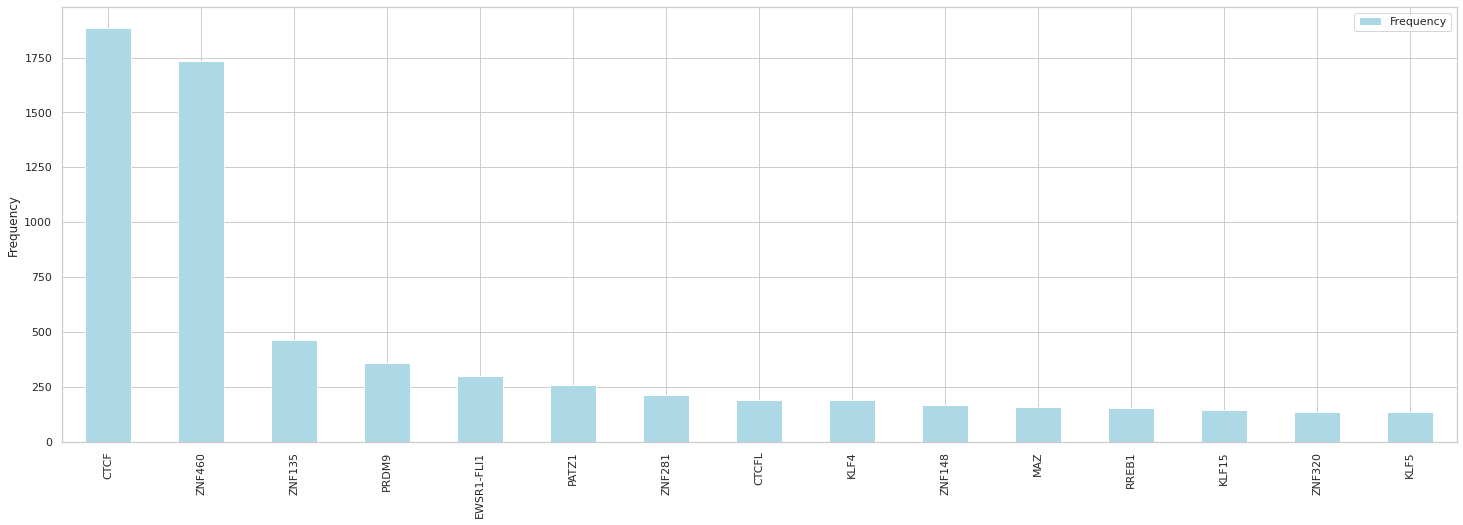

In [294]:
motifs_df.loc[motifs_df["Frequency"] > 125].plot(kind="bar", ylabel="Frequency", color="lightblue")

In [282]:
motifs_df.quantile(0.95)

Frequency    848.85
Name: 0.95, dtype: float64